In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [66]:
#This tells pandas to read the data
Aviation_Data = pd.read_csv("/content/Aviation_Data.csv", low_memory=False)
#Aviation_Data

In [67]:
Aviation_Data.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [68]:
Aviation_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [69]:
Aviation_Data.shape

(90348, 31)

This gives information about the data
Key Observations: the dataset has 90,348 rows and 31 columns.

Most columns such as Schedule, Latitude, Longitude, Aircraft.Category, etc. have a lot of missing values.

Most columns are of type object, and 5 are numerical (float64).

In [70]:
#This is to check for missing values
Aviation_Data.isnull().sum().sort_values(ascending=False)


,0
Schedule,77766
Air.carrier,73700
FAR.Description,58325
Aircraft.Category,58061
Longitude,55975
Latitude,55966
Airport.Code,40216
Airport.Name,37644
Broad.phase.of.flight,28624
Publication.Date,16689


In [71]:
#Calculating percentage of columns with missing values
Aviation_Data.isna().mean() * 100

,0
Event.Id,1.614867
Investigation.Type,0.000000
Accident.Number,1.614867
Event.Date,1.614867
Location,1.672422
Country,1.865011
Latitude,61.944924
Longitude,61.954886
Airport.Code,44.512330
Airport.Name,41.665560


A good number of columns have missing values e.g Latitude, Longitude, Aircraft.Category, FAR.Description, Schedule, Air.carrier.

Droping of  With more than 60% Missing Data  since they are likely not usable

In [72]:
Aviation_Data.drop(['Schedule', 'Air.carrier', 'FAR.Description', 'Aircraft.Category', 'Latitude', 'Longitude'], axis=1, inplace=True)

To Confirm Remaining Columns
Check again which columns still have missing data

In [73]:
Aviation_Data.isnull().sum().sort_values(ascending=False)
Aviation_Data.isna().mean() * 100

,0
Event.Id,1.614867
Investigation.Type,0.000000
Accident.Number,1.614867
Event.Date,1.614867
Location,1.672422
Country,1.865011
Airport.Code,44.512330
Airport.Name,41.665560
Injury.Severity,2.721698
Aircraft.damage,5.150086


Further, I drop columns with more than 40% missing value i.e Airport.Code and Airport.Name since they are likely less significant

In [74]:
Aviation_Data.drop(['Airport.Code', 'Airport.Name'], axis=1, inplace=True)

Data Imputation

Filling missing with 0.0 since no data might mean no injuries

In [75]:
Aviation_Data['Total.Fatal.Injuries'] = Aviation_Data['Total.Fatal.Injuries'].fillna(0.0)
Aviation_Data['Total.Serious.Injuries'] = Aviation_Data['Total.Serious.Injuries'].fillna(0.0)
Aviation_Data['Total.Minor.Injuries'] = Aviation_Data['Total.Minor.Injuries'].fillna(0.0)
Aviation_Data['Total.Uninjured'] = Aviation_Data['Total.Uninjured'].fillna(0.0)
Aviation_Data

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Registration.Number,Make,...,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NC6404,Stinson,...,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,N5069P,Piper,...,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,N5142R,Cessna,...,Reciprocating,Personal,3.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,N1168J,Rockwell,...,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,N15NY,Cessna,...,NaN,Personal,1.0,2.0,0.0,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,Minor,NaN,N1867H,PIPER,...,NaN,Personal,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
90344,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,N2895Z,BELLANCA,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
90345,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,Non-Fatal,Substantial,N749PJ,AMERICAN CHAMPION AIRCRAFT,...,NaN,Personal,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
90346,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,N210CU,CESSNA,...,NaN,Personal,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [76]:
#Aviation_Data.columns
#Aviation_Data.describe()

Categorical Columns – fill with "Unknown"

In [77]:
Aviation_Data['Engine.Type'] = Aviation_Data['Engine.Type'].fillna("Unknown")
Aviation_Data['Purpose.of.flight'] = Aviation_Data['Purpose.of.flight'].fillna("Unknown")
Aviation_Data['Weather.Condition'] = Aviation_Data['Weather.Condition'].fillna("Unknown")
Aviation_Data['Aircraft.damage'] = Aviation_Data['Aircraft.damage'].fillna("Unknown")
Aviation_Data['Registration.Number'] = Aviation_Data['Registration.Number'].fillna("Unknown")
Aviation_Data['Injury.Severity'] = Aviation_Data['Injury.Severity'].fillna("Unknown")
Aviation_Data['Country'] = Aviation_Data['Country'].fillna("Unknown")
Aviation_Data['Amateur.Built'] = Aviation_Data['Amateur.Built'].fillna("Unknown")
Aviation_Data['Model'] = Aviation_Data['Model'].fillna("Unknown")
Aviation_Data['Make'] = Aviation_Data['Make'].fillna("Unknown")
Aviation_Data['Location'] = Aviation_Data['Location'].fillna("Unknown")
Aviation_Data['Report.Status'] = Aviation_Data['Report.Status'].fillna("Unknown")
Aviation_Data['Broad.phase.of.flight'] = Aviation_Data['Broad.phase.of.flight'].fillna("Unknown")
print(Aviation_Data['Event.Date'].head(10))

0    1948-10-24
1    1962-07-19
2    1974-08-30
3    1977-06-19
4    1979-08-02
5    1979-09-17
6    1981-08-01
7    1982-01-01
8    1982-01-01
9    1982-01-01
Name: Event.Date, dtype: object


Data type for Event.Time is object

In [78]:
print(Aviation_Data['Event.Date'].sample(10))

20559    1988-06-15
66044    2009-03-05
85627    2020-03-27
89123    2022-05-06
72649    2012-09-05
86184    2020-07-29
51756    2001-11-10
54855    2003-06-15
55166    2003-07-23
37136    1995-04-22
Name: Event.Date, dtype: object


Event.Date is a column of interest and still has missing values

Replace the missing values with 2000-01-01

In [79]:
# Step 1: Convert to datetime and let invalid ones to NaT
Aviation_Data['Event.Date'] = pd.to_datetime(Aviation_Data['Event.Date'], errors='coerce')

# Step 2: Replace only the NaT values with placeholder
Aviation_Data['Event.Date'] = Aviation_Data['Event.Date'].fillna(pd.Timestamp('2000-01-01'))

In [80]:
print("Replaced missing dates:", (Aviation_Data['Event.Date'] == '2000-01-01').sum())


Replaced missing dates: 1461


There are 1461 replaced values

In [81]:
print(Aviation_Data['Event.Date'].sample(10))

75842   2014-08-01
21691   1988-10-15
21211   1988-08-18
61350   2006-09-02
16091   1986-10-11
14643   1986-05-12
75344   2014-05-19
77433   2015-07-25
63181   2007-08-15
55156   2003-07-22
Name: Event.Date, dtype: datetime64[ns]


To check for inconsistencies in aircraft Model


In [82]:
Cleaned_df=pd.read_csv("/content/Cleaned_Aviation_Data_Final.csv", low_memory=False)
Cleaned_df.head()

,Investigation.Type,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status
0,Accident,24/10/1948,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NC6404,Stinson,108-3,No,1,Reciprocating,Personal,2,0,0,0,UNK,Cruise,Probable Cause
1,Accident,19/07/1962,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,N5069P,PIPER,PA24-180,No,1,Reciprocating,Personal,4,0,0,0,UNK,Unknown,Probable Cause
2,Accident,30/08/1974,"Saltville, VA",United States,Fatal(3),Destroyed,N5142R,CESSNA,172M,No,1,Reciprocating,Personal,3,0,0,0,IMC,Cruise,Probable Cause
3,Accident,19/06/1977,"EUREKA, CA",United States,Fatal(2),Destroyed,N1168J,Rockwell,112,No,1,Reciprocating,Personal,2,0,0,0,IMC,Cruise,Probable Cause
4,Accident,02/08/1979,"Canton, OH",United States,Fatal(1),Destroyed,N15NY,CESSNA,501,No,0,Unknown,Personal,1,2,0,0,VMC,Approach,Probable Cause


In [83]:
Cleaned_df["Make"].value_counts()

,count
Make,
CESSNA,27149
PIPER,14870
BEECH,5372
BOEING,2745
BELL,2722
...,...
PERYERA ARNET,1
BALCOMB KENNETH C III,1
AEROPRAKT MANUFACTURING SP ZOO,1


In [84]:
# Your code here
# Strip leading/trailing spaces
Cleaned_df["Make"] = Cleaned_df["Make"].str.strip()
# Replace 'Marvel' with 'Marvel Comics'
Cleaned_df["Make"] = Cleaned_df["Make"].replace("Cessna", "CESSNA")
# Replace any remaining 'DC Comics' variants with consistent name
Cleaned_df["Make"] = Cleaned_df["Make"].replace("Piper", "PIPER")
Cleaned_df["Make"] = Cleaned_df["Make"].replace("Bell", "BELL")
Cleaned_df["Make"] = Cleaned_df["Make"].replace("Beech", "BEECH")
Cleaned_df["Make"] = Cleaned_df["Make"].replace("Boeing", "BOEING")

Replacing unk with UNK

In [85]:
#replacing unk with UNK
'''
Aviation_Data['Weather.Condition'] = (
    Aviation_Data['Weather.Condition']
    .str.lower()
    .str.replace(r'\bstrip\b', '', regex=True)
    .str.replace(r'\s+', ' ', regex=True)
    .str.strip()
    .replace({'unk.*': 'UNK'}, regex=True)
)
'''
Cleaned_df['Weather.Condition'].value_counts()
Cleaned_df["Weather.Condition"] = Cleaned_df["Weather.Condition"].replace("Unknown", "UNK")
Cleaned_df["Weather.Condition"] = Cleaned_df["Weather.Condition"].replace("Unk", "UNK")
Cleaned_df["Weather.Condition"]

,Weather.Condition
0,UNK
1,UNK
2,IMC
3,IMC
4,VMC
...,...
90343,UNK
90344,UNK
90345,VMC
90346,UNK


Checking the changes

In [86]:
Cleaned_df["Weather.Condition"].value_counts().head(20)

,count
Weather.Condition,
VMC,77303
UNK,7069
IMC,5976


In [87]:
Cleaned_df["Make"].value_counts().head(20)

,count
Make,
CESSNA,27149
PIPER,14870
BEECH,5372
BOEING,2745
BELL,2722
Unknown,1543
Grumman,1094
Mooney,1092
Robinson,946


In [88]:
Cleaned_df.to_csv("Cleaned_Aviation_Data_Final.csv", index=False)

Further correction of inconsistencies

This indicates that there more accidents when the weather condition was VMC ie. weather that allows pilots to fly using visual reference such as land mark. fewer accidents occured when weather condition was not known(UNK)

Visualization of important Columns

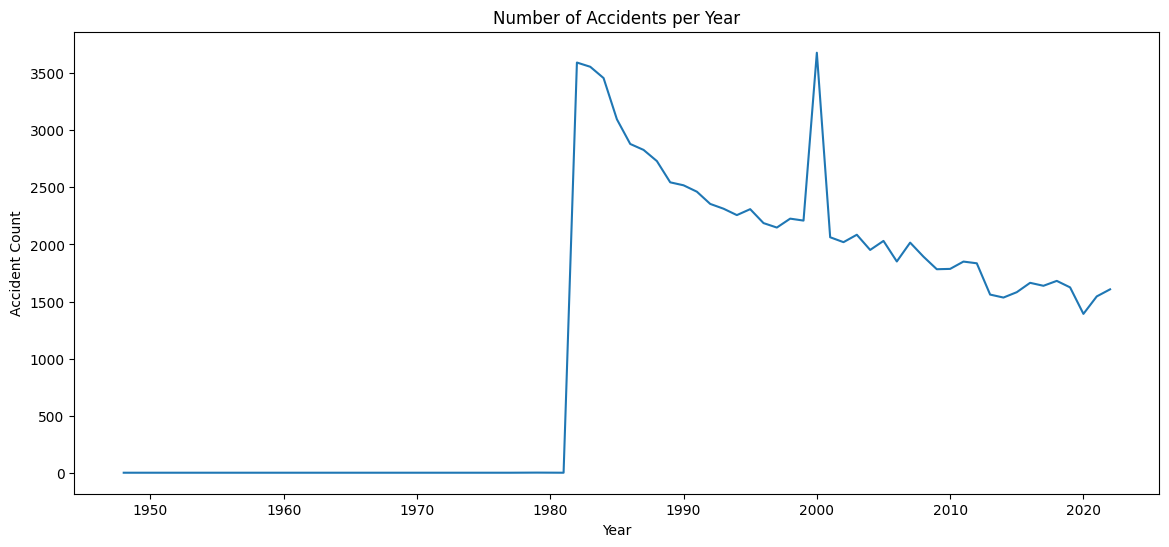

In [89]:
# Accidents over time
# Create 'Year' column from 'Event.Date'
Aviation_Data['Year'] = Aviation_Data['Event.Date'].dt.year

plt.figure(figsize=(14, 6))
Aviation_Data['Year'].value_counts().sort_index().plot()
plt.title('Number of Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Accident Count')
plt.show()

there were no accidents between 1950 and 1980. However, in 1980 they plummeted upto 3500 and thereafter the number of Accidents delined gradually to about 2000 in the year 2020

Analysing Data to Answer the Business Problem

Investigation by make and model

Count of injuries severity by aircraft

Key performance index for the best make and model

Deductions

Most accidents were caused by CESSNA 152 and  model 152 aircrafts, followed by PIPER

Risk Severity Analysis

The following are Manufacturers with reliable safety records.i.e Aircraft with lowest fatality and damage rates.
I therefore recommend the investor to them

1.INTERNATIONAL INC  
2. AMERICAN BLIMP CORP
3. AMERICAN LEGEND AIRCRAFT CO
4.ARROW FALCON EXPORTERS INC
5. AVID AIRCRAFT
6. BENNETT  
7. BOEING COMPANY
8. BRITISH AIRCRAFT CORP. (BAC)
9. BUCKER FLUGZEUGBAU  
10. CENTRAIR                                

Visualize Low-Risk Aircraft

Very negligible fatality rate as can be seen

Risk by Type of Operation

In [90]:
#checking Missing Data in Detail
Aviation_Data.isnull().sum().sort_values(ascending=False)

,0
Publication.Date,16689
Number.of.Engines,7543
Event.Id,1459
Accident.Number,1459
Location,0
Country,0
Investigation.Type,0
Event.Date,0
Aircraft.damage,0
Injury.Severity,0


In [91]:
Aviation_Data.drop(['Publication.Date', 'Event.Id', 'Accident.Number'], axis=1, inplace=True)

In [92]:
Aviation_Data.isnull().sum().sort_values(ascending=False)

,0
Number.of.Engines,7543
Event.Date,0
Location,0
Country,0
Investigation.Type,0
Injury.Severity,0
Aircraft.damage,0
Make,0
Registration.Number,0
Model,0


In [93]:
Aviation_Data['Number.of.Engines'] = Aviation_Data['Engine.Type'].fillna("Unknown")

Data is ready for Analysis after cleaning

In [94]:
Aviation_Data.isnull().sum().sort_values(ascending=False)

,0
Investigation.Type,0
Event.Date,0
Location,0
Country,0
Injury.Severity,0
Aircraft.damage,0
Registration.Number,0
Make,0
Model,0
Amateur.Built,0


In [95]:
Aviation_Data.to_csv("Cleaned_Aviation_Data.csv", index=False)